In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
#Data Collection
loan_dataset = pd.read_csv('loan_data.csv')
loan_dataset

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[614 rows x 13 columns]

In [3]:
# loan_dataset.describe()
loan_dataset.groupby('Loan_Status').mean()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_Status                                                                     
N                5446.078125        1877.807292  151.220994        344.064516   
Y                5384.068720        1504.516398  144.294404        341.072464   

             Credit_History  
Loan_Status                  
N                  0.541899  
Y                  0.981818

In [4]:
loan_dataset.isnull().sum()#Data has lot of missing values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
#Dropping the missing values-> Cannot do imputation since many values are categorical
loan_dataset = loan_dataset.dropna()

In [6]:
loan_dataset.isnull().sum()
loan_dataset.shape

(480, 13)

In [7]:
#Label Encoding
loan_dataset.replace({'Loan_Status':{'N':0,'Y':1}}, inplace=True)
loan_dataset.head()

c:\python\python38-32\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Loan_ID Gender Married Dependents     Education Self_Employed  \
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   
5  LP001011   Male     Yes          2      Graduate           Yes   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   
5             5417             4196.0       267.0             360.0   

   Credit_History Property_Area  Loan_Status  
1             1.0         Rural            0  
2             1.0         Urban            1  
3             1.0         Urban            1  
4             1.0         Urban            1  
5             1.0         Urban            1

In [8]:
loan_dataset['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [9]:
#Replace value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)
loan_dataset['Dependents'].value_counts()
loan_dataset['Property_Area'].value_counts()

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

## Data Visualization

<AxesSubplot:xlabel='Education', ylabel='count'>

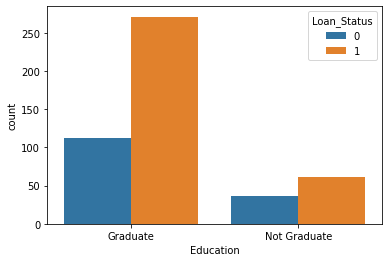

In [10]:
#Education and loan status
sns.countplot(x='Education', hue = 'Loan_Status', data=loan_dataset)

<AxesSubplot:xlabel='Married', ylabel='count'>

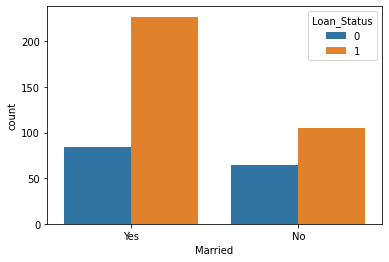

In [11]:
#Marital Status and loan status
sns.countplot(x='Married', hue = 'Loan_Status', data=loan_dataset)

In [12]:
#Convert all categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Female':0,'Male':1},'Self_Employed':{'No':0,'Yes':1},
                     'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Not Graduate':0,'Graduate':1}}, inplace=True)
loan_dataset.to_csv('newdata.csv')

In [13]:
#Separating data and labels
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'], axis=1)
Y = loan_dataset['Loan_Status']
print(X, Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [14]:
#Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1, stratify=Y ,random_state=2)
Y_test.value_counts()

1    33
0    15
Name: Loan_Status, dtype: int64

In [28]:
#Model Training
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

LogisticRegression()

In [29]:
#Model Evaluation
#Training data accuracy
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
training_data_accuracy

0.8009259259259259

In [30]:
#Test data accuracy
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
test_data_accuracy

0.8333333333333334

In [34]:
#Predictive System
features = (1,1,0,1,0,2383,3334.0,172.0,360.0,1.0,1)
features_numpy = np.asarray(features)
features_reshaped = features_numpy.reshape(1,-1)
prediction = classifier.predict(features_reshaped)
prediction[0] 

1